In [2]:
import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.imdb.load_data(num_words=200)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input,train_target
)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500,16))
model.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True)) # return_sequences 모든 은닉 상태 출력을 전달 
model.add(keras.layers.LSTM(8, dropout=0.2)) # 마지막 은닉상태만 출력 
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5592 - loss: 0.6726 - val_accuracy: 0.7046 - val_loss: 0.5793
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7079 - loss: 0.5742 - val_accuracy: 0.7235 - val_loss: 0.5517
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7112 - loss: 0.5644 - val_accuracy: 0.7261 - val_loss: 0.5474
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7312 - loss: 0.5439 - val_accuracy: 0.7320 - val_loss: 0.5371
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7296 - loss: 0.5383 - val_accuracy: 0.7315 - val_loss: 0.5384
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7260 - loss: 0.5391 - val_accuracy: 0.7339 - val_loss: 0.5315
Epoch 7/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7365 - loss: 0.5315 - val_accuracy: 0.7341 - val_loss: 0.5385
Epoch 8/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7395 - loss: 0

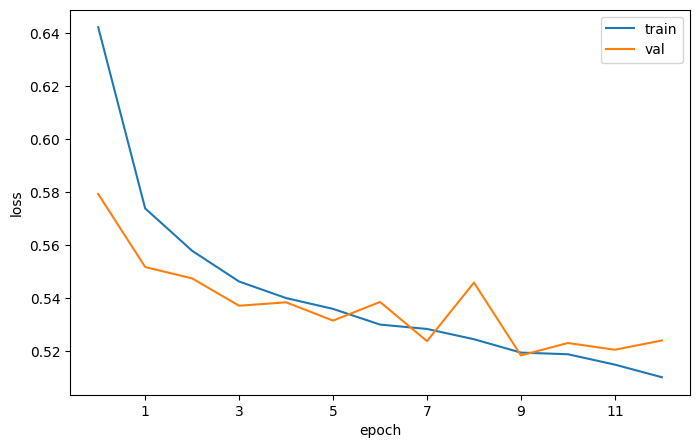

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
epochs = range(1, len(hist.history['loss']), 2)
plt.xticks(epochs)
plt.ylabel('loss')
plt.legend()
plt.show()

In [3]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500,16))
model.add(keras.layers.GRU(8, dropout=0.2, return_sequences=True)) # return_sequences 모든 은닉 상태 출력을 전달 
model.add(keras.layers.GRU(8, dropout=0.2)) # 마지막 은닉상태만 출력 
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 8)         │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,065 (35.41 KB)

 Trainable params: 9,065 (35.41 KB)

 Non-trainable params: 0 (0.00 B)